In [1]:
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import *
import pandas as pd
import numpy as np
import random
import shap

path = "C:/Users/samue/OneDrive/Documents/GitHub/Explainable-Ai-Comps-2024/MOOC"
path = "/home/johnsonlacosss/Desktop/Explainable-Ai-Comps-2024/MOOC"

sys.path.append(f"{path}/src/") # Add /src/ to path
from svc import SVC
from mlp import MLPClassifier
from data_loader import DataLoader, plot_confusion_matrix

/tmp/ipykernel_113371/3848008069.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# Data path
dl = DataLoader()
X_train, X_test, y_train, y_test = dl.load(path = f"{path}/data/")
dummy_value = np.array([[1,	0,	0.92,	11000, 32,	197757,	4,	22,	8,	1000]]) # Dummy value (2D Array)
feature_names = ['Viewed?',	'Gender (M/F)', 'Grade', 'Total interactions', 'Total days active',	'Total videos played',	'Total chapters completed',	'Age',	'Total votes (forum)',	'Total words written (forum)']
all_classes = all_classes=['Not Completed','Completed']

svc = SVC(from_file = True, filename= f"{path}/src/MITx-SVC.pkl") # Support Vector Classifier
mlp = MLPClassifier(from_file = True, filename = f"{path}/src/MITx-MLP.pkl") # Multi-Layer Perceptron Classifier


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Trying to unpickle estimator SVC from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more i

In [3]:
X_complete, y_complete, X_incomplete, y_incomplete = dl.load_sample_data(f"{path}/data/sample_data.pkl")
X_sample, y_sample = dl.load_sample_data(f"{path}/data/sample_data.pkl", concatenated = True)

PermutationExplainer explainer: 101it [02:46,  1.76s/it]                         


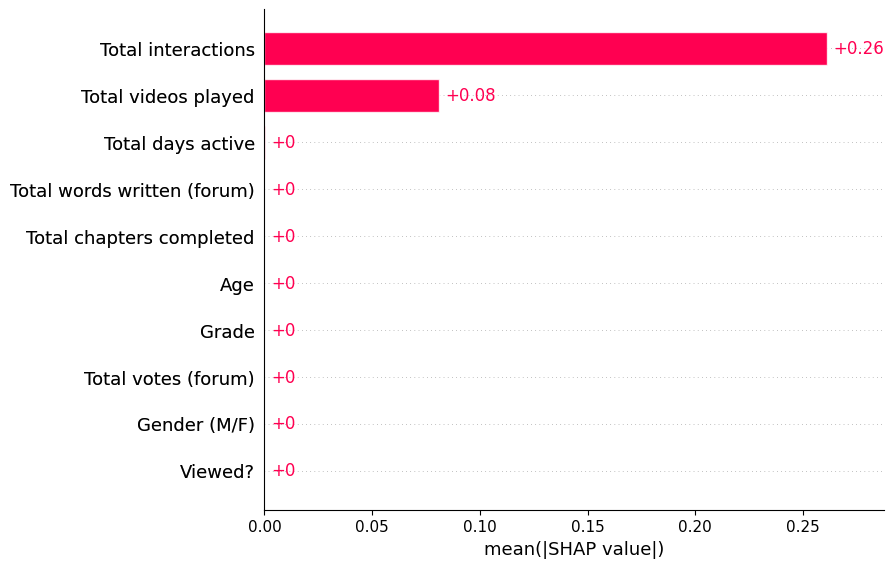

In [4]:
permutation = shap.explainers.Permutation(svc.predict_proba, X_train, feature_names=feature_names)
perm_shap_vals = permutation(X_sample)[..., 0] # Shapley values for all samples
# perm_shap_vals = permutation(X_complete[:100])[..., 0] + permutation(X_incomplete[:100])[..., 1]

''' PLOTTING: '''
shap.plots.bar(perm_shap_vals, show=False)
savefig(f"{path}/Shapley/Support-Vector Machine/Overall.png", bbox_inches='tight')

# shap.plots.violin(perm_shap_vals)
# shap.plots.heatmap(perm_shap_vals)

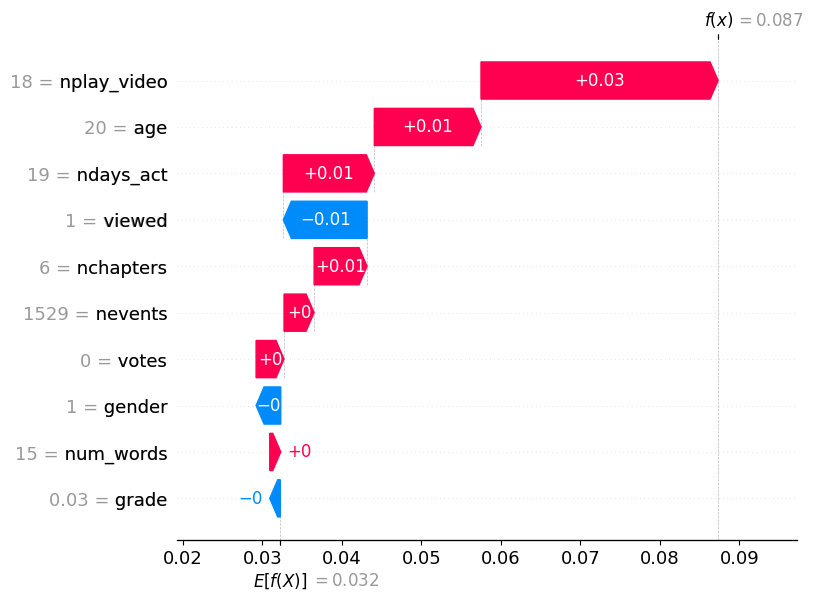

In [9]:
shap.plots.waterfall(perm_shap_vals[0])